Context

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

Attribute Information:
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

D (Death): Indicates that the patient has deceased.

C (Censored): Refers to patients who are still alive at the time of analysis but have been censored (meaning their survival time is not fully observed).

CL (Censored due to liver transplantation): Denotes patients who are alive at the time of analysis due to having undergone liver transplantation

4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

# Importing Necessary Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


%matplotlib inline

# Loading the Dataset

In [2]:
df=pd.read_csv('cirrhosis.csv')

# Initial Data Analysis

In [3]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [4]:
# Convert age from days to years
df['Age'] = (df['Age'] / 365.25).round()

In [5]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,67.0,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,39.0,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,57.0,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,58.0,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [6]:
df.shape

(418, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    float64
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

# Data Cleaning

In [8]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [9]:
# Extracting rows with missing values
df[df['Drug'].isnull() | df['Ascites'].isnull() | df['Hepatomegaly'].isnull() | df['Spiders'].isnull() | df['Cholesterol'].isnull() | df['Copper'].isnull() | df['Alk_Phos'].isnull() | df['SGOT'].isnull() | df['Tryglicerides'].isnull() | df['Platelets'].isnull() | df['Prothrombin'].isnull() | df['Stage'].isnull()].head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
5,6,2503,D,Placebo,66.0,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
13,14,1217,D,Placebo,56.0,M,Y,Y,N,Y,0.8,NaN,2.27,43.0,728.0,71.00,NaN,156.0,11.0,4.0
39,40,4467,C,D-penicillamine,47.0,F,N,N,N,N,1.3,NaN,3.34,105.0,11046.6,104.49,NaN,358.0,11.0,4.0
40,41,1350,D,D-penicillamine,34.0,F,N,Y,N,N,6.8,NaN,3.26,96.0,1215.0,151.90,NaN,226.0,11.7,4.0
41,42,4453,C,Placebo,34.0,F,N,Y,Y,N,2.1,NaN,3.54,122.0,8778.0,56.76,NaN,344.0,11.0,4.0


In [10]:
# Removing rows with missing values
df = df.dropna(subset=['Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Cholesterol', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage'])

In [11]:
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [12]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

In [13]:
# Displaying the records
duplicate_rows

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [14]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

The dataset contains 0 duplicate rows that need to be removed.


In [15]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,61.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,58.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,62.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,38.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [16]:
df.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

In [17]:
# Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,276.0,158.615942,91.662926,1.00,79.7500,157.500,240.2500,312.00
N_Days,276.0,1979.166667,1112.380295,41.00,1185.7500,1788.000,2689.7500,4556.00
Age,276.0,49.797101,10.533865,26.00,41.7500,50.000,57.0000,78.00
Bilirubin,276.0,3.333696,4.601074,0.30,0.8000,1.400,3.5250,28.00
Cholesterol,276.0,371.260870,234.788363,120.00,249.5000,310.000,401.0000,1775.00
Albumin,276.0,3.516812,0.404789,1.96,3.3100,3.545,3.7725,4.40
Copper,276.0,100.768116,88.268746,4.00,42.7500,74.000,129.2500,588.00
Alk_Phos,276.0,1996.611594,2115.477894,289.00,922.5000,1277.500,2068.2500,13862.40
SGOT,276.0,124.119239,56.719952,28.38,82.4575,116.625,153.4500,457.25
Tryglicerides,276.0,124.978261,65.280761,33.00,85.0000,108.000,151.2500,598.00


In [18]:
#drop N_Days column
df.drop('N_Days', axis=1, inplace=True)

In [19]:
df

,ID,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,C,D-penicillamine,61.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,C,Placebo,58.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,C,D-penicillamine,62.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,C,D-penicillamine,38.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


# Exploratory Data Analysis (EDA)

Descriptive Statistics

In [20]:
# Numerical Variable Analysis
numerical_vars = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 
                  'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Summary statistics
print("Summary Statistics:")
df[numerical_vars].describe()

Summary Statistics:


,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,49.797101,3.333696,371.260870,3.516812,100.768116,1996.611594,124.119239,124.978261,261.771739,10.735507
std,10.533865,4.601074,234.788363,0.404789,88.268746,2115.477894,56.719952,65.280761,93.128857,1.008315
min,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,28.380000,33.000000,62.000000,9.000000
25%,41.750000,0.800000,249.500000,3.310000,42.750000,922.500000,82.457500,85.000000,200.000000,10.000000
50%,50.000000,1.400000,310.000000,3.545000,74.000000,1277.500000,116.625000,108.000000,257.000000,10.600000
75%,57.000000,3.525000,401.000000,3.772500,129.250000,2068.250000,153.450000,151.250000,318.250000,11.200000
max,78.000000,28.000000,1775.000000,4.400000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000


Data Visualization

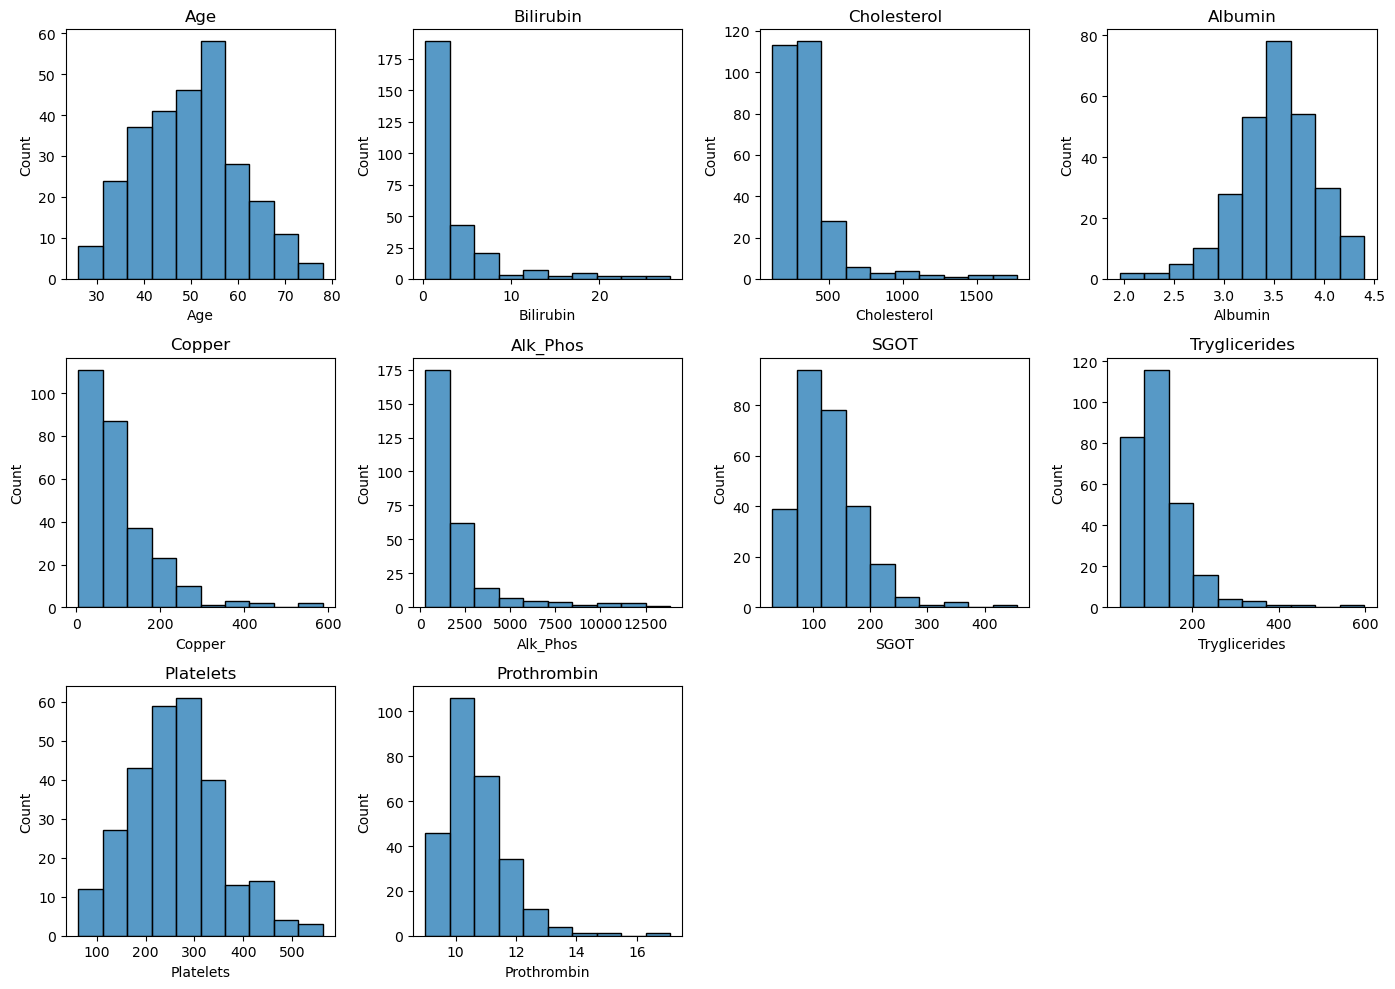

In [21]:
# Histograms for numerical variables
plt.figure(figsize=(14, 10))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[var], bins=10)
    plt.title(var)
plt.tight_layout()
plt.show()

Bin width = (max value - min value) / number of bins

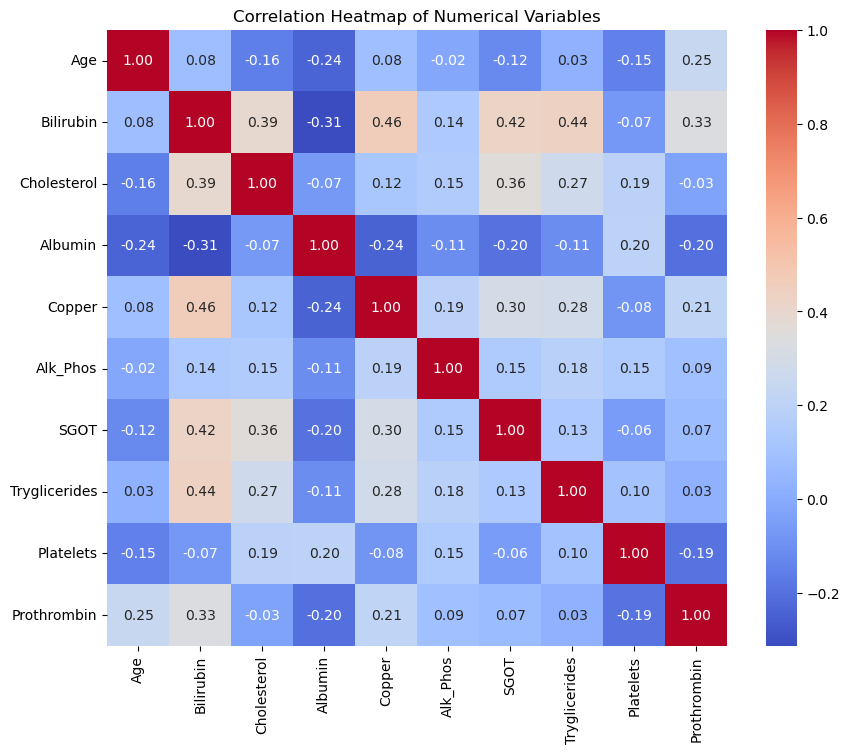

In [22]:
# Calculate correlation matrix
corr_matrix = df[numerical_vars].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Color Coding:
Darker colors represent stronger correlations.

Lighter colors indicate weaker correlations.

Positive correlations (when one variable increases, the other tends to increase) are usually shown in warm colors like red or orange.

Negative correlations (when one variable increases, the other tends to decrease) are usually shown in cool colors like blue or green.

In [23]:
# Group by 'Stage' and compute mean for all blood tests
means_by_stage = df.groupby('Stage').agg({
    'Bilirubin': 'mean',
    'Cholesterol': 'mean',
    'Albumin': 'mean',
    'Copper': 'mean',
    'Alk_Phos': 'mean',
    'SGOT': 'mean',
    'Tryglicerides': 'mean',
    'Platelets': 'mean',
    'Prothrombin': 'mean'
})

means_by_stage

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
Stage,,,,,,,,,
1.0,1.208333,270.000000,3.698333,65.250000,1510.116667,84.504167,88.583333,267.500000,11.125000
2.0,2.000000,356.050847,3.613051,67.627119,1917.928814,118.779322,114.576271,291.169492,10.342373
3.0,3.027928,418.000000,3.621532,95.162162,2162.751351,125.562252,130.432432,272.315315,10.527928
4.0,4.803191,338.542553,3.309574,132.723404,1911.917021,130.824149,129.712766,230.138298,11.177660


In [24]:
# List of categorical variables
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

# Group and count each categories of Status, Drugs, Sex, Symptoms, Stage
for var in categorical_vars:
    counts = df.groupby(var).size().reset_index(name='Count')
    print(f"Counts for {var} Categories:")
    print(counts)

Counts for Status Categories:
  Status  Count
0      C    147
1     CL     18
2      D    111
Counts for Drug Categories:
              Drug  Count
0  D-penicillamine    136
1          Placebo    140
Counts for Sex Categories:
  Sex  Count
0   F    242
1   M     34
Counts for Ascites Categories:
  Ascites  Count
0       N    257
1       Y     19
Counts for Hepatomegaly Categories:
  Hepatomegaly  Count
0            N    134
1            Y    142
Counts for Spiders Categories:
  Spiders  Count
0       N    196
1       Y     80
Counts for Edema Categories:
  Edema  Count
0     N    234
1     S     25
2     Y     17
Counts for Stage Categories:
   Stage  Count
0    1.0     12
1    2.0     59
2    3.0    111
3    4.0     94


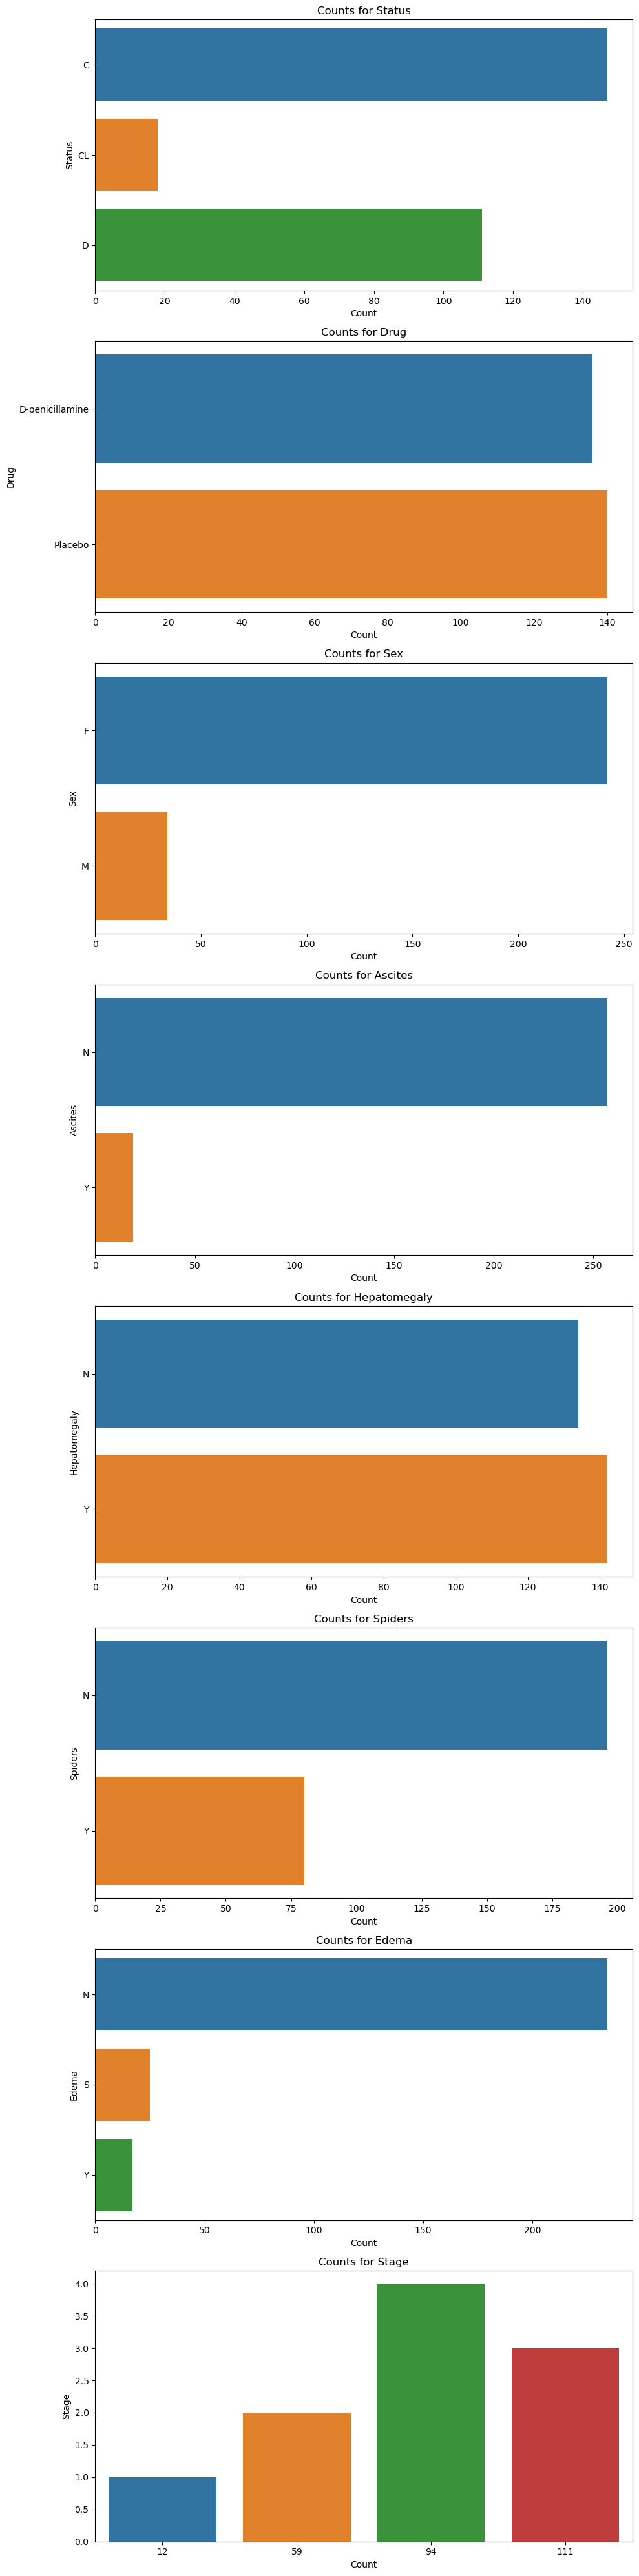

In [25]:
# Set up the plot grid
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(10, len(categorical_vars)*5))

# Iterate through each categorical variable
for i, var in enumerate(categorical_vars):
    # Group and count each subcategory
    counts = df.groupby(var).size().reset_index(name='Count')
    
    # Plot the bar graph
    sns.barplot(x='Count', y=var, data=counts, ax=axes[i])
    
    # Set title and labels
    axes[i].set_title(f"Counts for {var}")
    axes[i].set_ylabel(var)
    axes[i].set_xlabel("Count")

plt.tight_layout()
plt.show()

In [26]:
# List of categorical variables
categorical_vars = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# Group and count each categories of Status, Drugs, Sex, Symptoms for each Stage
for var in categorical_vars:
    print(f"Counts for {var} Categories by Stage:")
    for stage in sorted(df['Stage'].unique()):
        stage_data = df[df['Stage'] == stage]
        counts = stage_data.groupby(var).size().reset_index(name='Count')
        print(f"Stage {stage}:")
        print(counts)

Counts for Status Categories by Stage:
Stage 1.0:
  Status  Count
0      C     11
1      D      1
Stage 2.0:
  Status  Count
0      C     42
1     CL      3
2      D     14
Stage 3.0:
  Status  Count
0      C     62
1     CL      8
2      D     41
Stage 4.0:
  Status  Count
0      C     32
1     CL      7
2      D     55
Counts for Drug Categories by Stage:
Stage 1.0:
              Drug  Count
0  D-penicillamine      9
1          Placebo      3
Stage 2.0:
              Drug  Count
0  D-penicillamine     31
1          Placebo     28
Stage 3.0:
              Drug  Count
0  D-penicillamine     51
1          Placebo     60
Stage 4.0:
              Drug  Count
0  D-penicillamine     45
1          Placebo     49
Counts for Sex Categories by Stage:
Stage 1.0:
  Sex  Count
0   F     10
1   M      2
Stage 2.0:
  Sex  Count
0   F     53
1   M      6
Stage 3.0:
  Sex  Count
0   F     99
1   M     12
Stage 4.0:
  Sex  Count
0   F     80
1   M     14
Counts for Ascites Categories by Stage:
Stage 1.

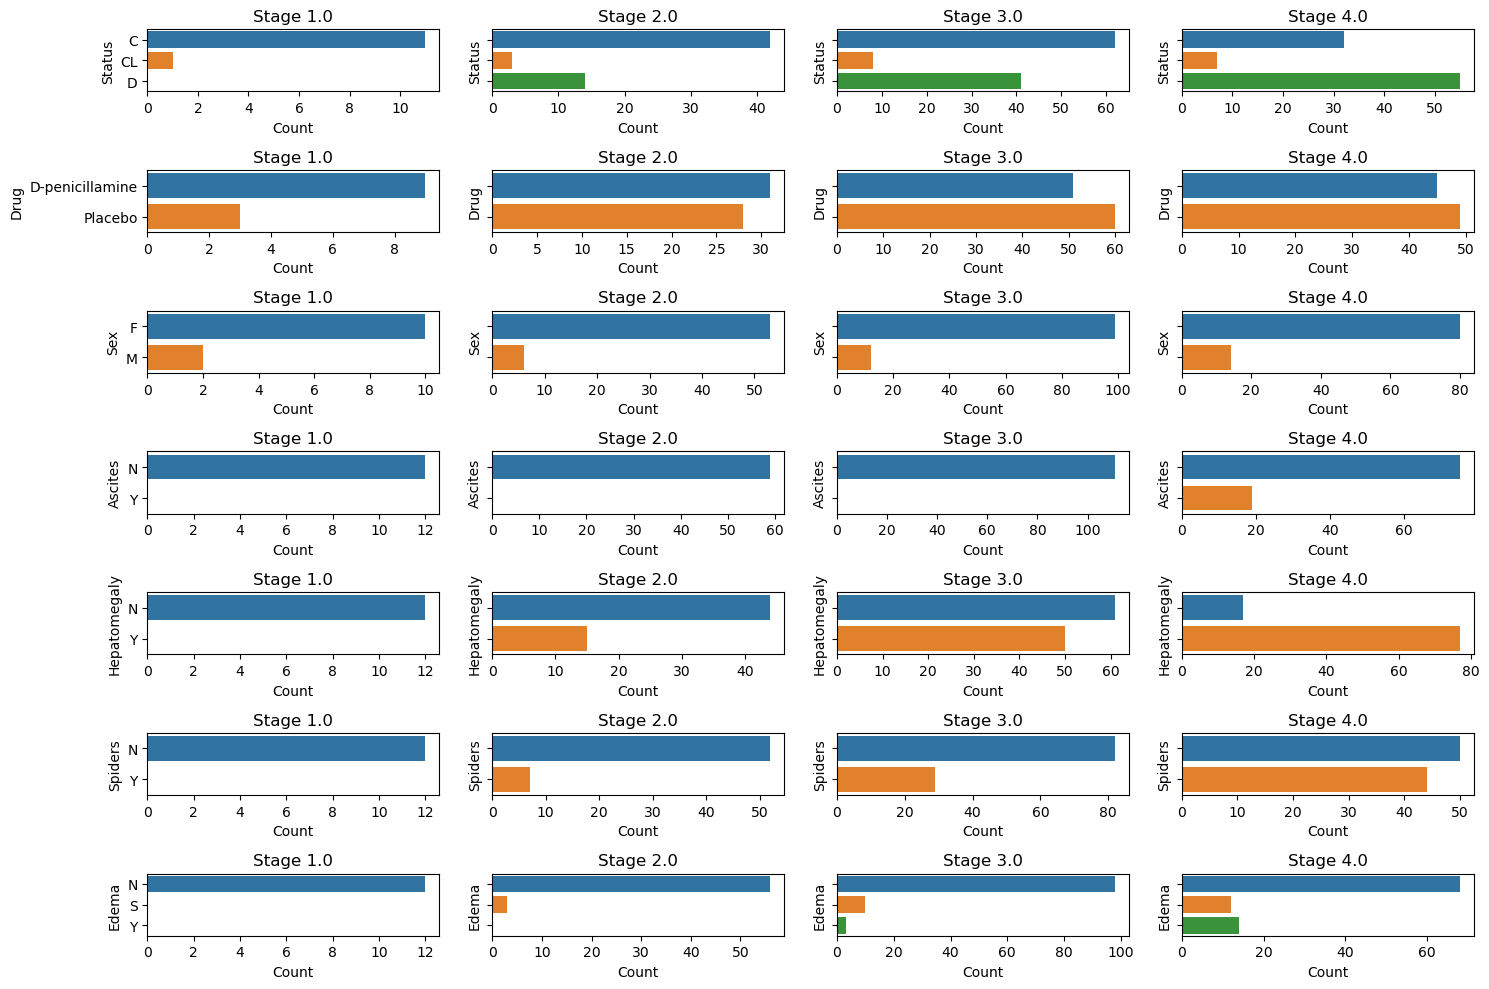

In [27]:
# Set up the plot grid
fig, axes = plt.subplots(len(categorical_vars), len(df['Stage'].unique()), figsize=(15, 10), sharey='row')

# Iterate through each categorical variable
for i, var in enumerate(categorical_vars):
    # Iterate through each stage
    for j, stage in enumerate(sorted(df['Stage'].unique())):
        # Group and count each subcategory for the current stage
        stage_data = df[df['Stage'] == stage]
        counts = stage_data.groupby(var).size().reset_index(name='Count')
        
        # Plot the bar graph
        sns.barplot(x='Count', y=var, data=counts, ax=axes[i, j])
        
        # Set title and labels
        axes[i, j].set_title(f"Stage {stage}")
        axes[i, j].set_ylabel(var)
        axes[i, j].set_xlabel("Count")

plt.tight_layout()
plt.show()

In [28]:
df

,ID,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,D,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,C,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,D,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,D,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,CL,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,C,D-penicillamine,61.0,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,C,Placebo,58.0,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,C,D-penicillamine,62.0,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,C,D-penicillamine,38.0,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


# Feature Engineering

Feature Engineering helps to make a Patients centric dataset.

In [29]:
data = pd.DataFrame()

# Status encoding
# Encode 'Status' into a single new column
status_mapping = {'D': 1, 'C': 2, 'CL': 3}
data['Status_Encoded'] = df['Status'].map(status_mapping)

# Copy other columns from the original dataframe
data['ID'] = df['ID']

# Rearrange the columns
data = data[['ID', 'Status_Encoded']]

In [30]:
data

,ID,Status_Encoded
0,1,1
1,2,2
2,3,1
3,4,1
4,5,3
...,...,...
307,308,2
308,309,2
309,310,2
310,311,2


In [31]:
# Drugs encoding
# Encode 'Drug' into a single new column
drug_mapping = {'D-penicillamine': 1, 'Placebo': 2}
data['Drug_Encoded'] = df['Drug'].map(drug_mapping)

In [32]:
data

,ID,Status_Encoded,Drug_Encoded
0,1,1,1
1,2,2,1
2,3,1,1
3,4,1,1
4,5,3,2
...,...,...,...
307,308,2,1
308,309,2,2
309,310,2,1
310,311,2,1


In [33]:
# Define age groups and their corresponding numerical representations
age_groups = {
    '0-30': 1,
    '31-40': 2,
    '41-50': 3,
    '51-60': 4,
    '61-70': 5,
    '71+': 6
}

# Encode 'Age' into a single new column based on age groups
def encode_age(age):
    if age <= 30:
        return age_groups['0-30']
    elif age <= 40:
        return age_groups['31-40']
    elif age <= 50:
        return age_groups['41-50']
    elif age <= 60:
        return age_groups['51-60']
    elif age <= 70:
        return age_groups['61-70']
    else:
        return age_groups['71+']

data['Age_Group_Encoded'] = df['Age'].apply(encode_age)

In [34]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded
0,1,1,1,4
1,2,2,1,4
2,3,1,1,5
3,4,1,1,4
4,5,3,2,2
...,...,...,...,...
307,308,2,1,5
308,309,2,2,4
309,310,2,1,5
310,311,2,1,2


In [35]:
# Sex encoding
# Encode 'Sex' into a single new column
sex_mapping = {'M': 1, 'F': 2}
data['Sex_Encoded'] = df['Sex'].map(sex_mapping)

In [36]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded
0,1,1,1,4,2
1,2,2,1,4,2
2,3,1,1,5,1
3,4,1,1,4,2
4,5,3,2,2,2
...,...,...,...,...,...
307,308,2,1,5,2
308,309,2,2,4,2
309,310,2,1,5,2
310,311,2,1,2,2


In [37]:
# Ascites encoding
# Encode 'Ascites' into a single new column
ascites_mapping = {'Y': 1, 'N': 2}
data['Ascites_Encoded'] = df['Ascites'].map(ascites_mapping)

In [38]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded
0,1,1,1,4,2,1
1,2,2,1,4,2,2
2,3,1,1,5,1,2
3,4,1,1,4,2,2
4,5,3,2,2,2,2
...,...,...,...,...,...,...
307,308,2,1,5,2,2
308,309,2,2,4,2,2
309,310,2,1,5,2,2
310,311,2,1,2,2,2


In [39]:
# Hepatomegaly encoding
# Encode 'Hepatomegaly' into a single new column
Hepatomegaly_mapping = {'Y': 1, 'N': 2}
data['Hepatomegaly_Encoded'] = df['Hepatomegaly'].map(Hepatomegaly_mapping)

In [40]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded
0,1,1,1,4,2,1,1
1,2,2,1,4,2,2,1
2,3,1,1,5,1,2,2
3,4,1,1,4,2,2,1
4,5,3,2,2,2,2,1
...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1
308,309,2,2,4,2,2,2
309,310,2,1,5,2,2,2
310,311,2,1,2,2,2,2


In [41]:
# Spiders encoding
# Encode 'Spiders' into a single new column
Spiders_mapping = {'Y': 1, 'N': 2}
data['Spiders_Encoded'] = df['Spiders'].map(Spiders_mapping)

In [42]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded
0,1,1,1,4,2,1,1,1
1,2,2,1,4,2,2,1,1
2,3,1,1,5,1,2,2,2
3,4,1,1,4,2,2,1,1
4,5,3,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2
308,309,2,2,4,2,2,2,2
309,310,2,1,5,2,2,2,2
310,311,2,1,2,2,2,2,2


In [43]:
# Edema encoding
# Encode 'Edema' into a single new column
Edema_mapping = {'Y': 1, 'N': 2, 'S': 3}
data['Edema_Encoded'] = df['Edema'].map(Edema_mapping)

In [44]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded
0,1,1,1,4,2,1,1,1,1
1,2,2,1,4,2,2,1,1,2
2,3,1,1,5,1,2,2,2,3
3,4,1,1,4,2,2,1,1,3
4,5,3,2,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2
308,309,2,2,4,2,2,2,2,2
309,310,2,1,5,2,2,2,2,2
310,311,2,1,2,2,2,2,2,2


In [45]:
# Define the threshold for Bilirubin
threshold = 1.2

# Encode 'Bilirubin' into a single new column based on the threshold
def encode_bilirubin(bilirubin):
    if bilirubin > threshold:
        return 1
    else:
        return 2

data['Bilirubin_Encoded'] = df['Bilirubin'].apply(encode_bilirubin)

In [46]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded
0,1,1,1,4,2,1,1,1,1,1
1,2,2,1,4,2,2,1,1,2,2
2,3,1,1,5,1,2,2,2,3,1
3,4,1,1,4,2,2,1,1,3,1
4,5,3,2,2,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2
308,309,2,2,4,2,2,2,2,2,2
309,310,2,1,5,2,2,2,2,2,1
310,311,2,1,2,2,2,2,2,2,1


In [47]:
# Define the threshold for Cholesterol
threshold = 200

# Encode 'Cholesterol' into a single new column based on the threshold
def encode_cholesterol(cholesterol):
    if cholesterol >= threshold:
        return 2
    else:
        return 1

data['Cholesterol_Encoded'] = df['Cholesterol'].apply(encode_cholesterol)

In [48]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded
0,1,1,1,4,2,1,1,1,1,1,2
1,2,2,1,4,2,2,1,1,2,2,2
2,3,1,1,5,1,2,2,2,3,1,1
3,4,1,1,4,2,2,1,1,3,1,2
4,5,3,2,2,2,2,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2
308,309,2,2,4,2,2,2,2,2,2,2
309,310,2,1,5,2,2,2,2,2,1,2
310,311,2,1,2,2,2,2,2,2,1,2


In [49]:
# Define the threshold for Albumin
threshold = 3.5

# Encode 'Albumin' into a single new column based on the threshold
def encode_albumin(albumin):
    if albumin >= threshold:
        return 2
    else:
        return 1

data['Albumin_Encoded'] = df['Albumin'].apply(encode_albumin)

In [50]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1
1,2,2,1,4,2,2,1,1,2,2,2,2
2,3,1,1,5,1,2,2,2,3,1,1,1
3,4,1,1,4,2,2,1,1,3,1,2,1
4,5,3,2,2,2,2,1,1,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2
308,309,2,2,4,2,2,2,2,2,2,2,1
309,310,2,1,5,2,2,2,2,2,1,2,1
310,311,2,1,2,2,2,2,2,2,1,2,1


In [51]:
# Encode 'Alk_Phos' into a single new column based on gender-specific thresholds
def encode_alk_phos(row):
    if row['Sex'] == 'F':
        if row['Alk_Phos'] > 104:
            return 1
        else:
            return 2
    elif row['Sex'] == 'M':
        if row['Alk_Phos'] > 120:
            return 1
        else:
            return 2

data['Alk_Phos_Encoded'] = df.apply(encode_alk_phos, axis=1)

In [52]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded,Alk_Phos_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1,1
1,2,2,1,4,2,2,1,1,2,2,2,2,1
2,3,1,1,5,1,2,2,2,3,1,1,1,1
3,4,1,1,4,2,2,1,1,3,1,2,1,1
4,5,3,2,2,2,2,1,1,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2,1
308,309,2,2,4,2,2,2,2,2,2,2,1,1
309,310,2,1,5,2,2,2,2,2,1,2,1,1
310,311,2,1,2,2,2,2,2,2,1,2,1,1


In [53]:
# Define the threshold for SGOT
threshold = 40

# Encode 'SGOT' into a single new column based on the threshold
def encode_sgot(sgot):
    if sgot > threshold:
        return 1
    else:
        return 2

data['SGOT_Encoded'] = df['SGOT'].apply(encode_sgot)

In [54]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded,Alk_Phos_Encoded,SGOT_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1,1,1
1,2,2,1,4,2,2,1,1,2,2,2,2,1,1
2,3,1,1,5,1,2,2,2,3,1,1,1,1,1
3,4,1,1,4,2,2,1,1,3,1,2,1,1,1
4,5,3,2,2,2,2,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2,1,1
308,309,2,2,4,2,2,2,2,2,2,2,1,1,1
309,310,2,1,5,2,2,2,2,2,1,2,1,1,1
310,311,2,1,2,2,2,2,2,2,1,2,1,1,1


In [55]:
# Define the threshold for Tryglicerides
threshold = 150

# Encode 'Tryglicerides' into a single new column based on the threshold
def encode_triglycerides(triglycerides):
    if triglycerides < threshold:
        return 1
    else:
        return 2

data['Triglycerides_Encoded'] = df['Tryglicerides'].apply(encode_triglycerides)

In [56]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded,Alk_Phos_Encoded,SGOT_Encoded,Triglycerides_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1,1,1,2
1,2,2,1,4,2,2,1,1,2,2,2,2,1,1,1
2,3,1,1,5,1,2,2,2,3,1,1,1,1,1,1
3,4,1,1,4,2,2,1,1,3,1,2,1,1,1,1
4,5,3,2,2,2,2,1,1,2,1,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2,1,1,1
308,309,2,2,4,2,2,2,2,2,2,2,1,1,1,1
309,310,2,1,5,2,2,2,2,2,1,2,1,1,1,1
310,311,2,1,2,2,2,2,2,2,1,2,1,1,1,1


In [57]:
# Define the threshold for Platelets
threshold = 150000

# Encode 'Platelets' into a single new column based on the threshold
def encode_platelets(platelets):
    if platelets < threshold:
        return 1
    else:
        return 2

data['Platelets_Encoded'] = df['Platelets'].apply(encode_platelets)

In [58]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded,Alk_Phos_Encoded,SGOT_Encoded,Triglycerides_Encoded,Platelets_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1,1,1,2,1
1,2,2,1,4,2,2,1,1,2,2,2,2,1,1,1,1
2,3,1,1,5,1,2,2,2,3,1,1,1,1,1,1,1
3,4,1,1,4,2,2,1,1,3,1,2,1,1,1,1,1
4,5,3,2,2,2,2,1,1,2,1,2,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2,1,1,1,1
308,309,2,2,4,2,2,2,2,2,2,2,1,1,1,1,1
309,310,2,1,5,2,2,2,2,2,1,2,1,1,1,1,1
310,311,2,1,2,2,2,2,2,2,1,2,1,1,1,1,1


In [59]:
# Define the threshold for Prothrombin
threshold = 13

# Encode 'Prothrombin' into a single new column based on the threshold
def encode_prothrombin(prothrombin):
    if prothrombin > threshold:
        return 1
    else:
        return 2

data['Prothrombin_Encoded'] = df['Prothrombin'].apply(encode_prothrombin)

In [60]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded,Alk_Phos_Encoded,SGOT_Encoded,Triglycerides_Encoded,Platelets_Encoded,Prothrombin_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1,1,1,2,1,2
1,2,2,1,4,2,2,1,1,2,2,2,2,1,1,1,1,2
2,3,1,1,5,1,2,2,2,3,1,1,1,1,1,1,1,2
3,4,1,1,4,2,2,1,1,3,1,2,1,1,1,1,1,2
4,5,3,2,2,2,2,1,1,2,1,2,2,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2,1,1,1,1,2
308,309,2,2,4,2,2,2,2,2,2,2,1,1,1,1,1,2
309,310,2,1,5,2,2,2,2,2,1,2,1,1,1,1,1,2
310,311,2,1,2,2,2,2,2,2,1,2,1,1,1,1,1,2


In [61]:
# Encode 'Stage' into a single new column
stage_mapping = {1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4}
data['Stage_Encoded'] = df['Stage'].map(stage_mapping)

In [62]:
data

,ID,Status_Encoded,Drug_Encoded,Age_Group_Encoded,Sex_Encoded,Ascites_Encoded,Hepatomegaly_Encoded,Spiders_Encoded,Edema_Encoded,Bilirubin_Encoded,Cholesterol_Encoded,Albumin_Encoded,Alk_Phos_Encoded,SGOT_Encoded,Triglycerides_Encoded,Platelets_Encoded,Prothrombin_Encoded,Stage_Encoded
0,1,1,1,4,2,1,1,1,1,1,2,1,1,1,2,1,2,4
1,2,2,1,4,2,2,1,1,2,2,2,2,1,1,1,1,2,3
2,3,1,1,5,1,2,2,2,3,1,1,1,1,1,1,1,2,4
3,4,1,1,4,2,2,1,1,3,1,2,1,1,1,1,1,2,4
4,5,3,2,2,2,2,1,1,2,1,2,2,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,2,1,5,2,2,1,2,2,2,2,2,1,1,1,1,2,2
308,309,2,2,4,2,2,2,2,2,2,2,1,1,1,1,1,2,2
309,310,2,1,5,2,2,2,2,2,1,2,1,1,1,1,1,2,2
310,311,2,1,2,2,2,2,2,2,1,2,1,1,1,1,1,2,2


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   ID                     276 non-null    int64
 1   Status_Encoded         276 non-null    int64
 2   Drug_Encoded           276 non-null    int64
 3   Age_Group_Encoded      276 non-null    int64
 4   Sex_Encoded            276 non-null    int64
 5   Ascites_Encoded        276 non-null    int64
 6   Hepatomegaly_Encoded   276 non-null    int64
 7   Spiders_Encoded        276 non-null    int64
 8   Edema_Encoded          276 non-null    int64
 9   Bilirubin_Encoded      276 non-null    int64
 10  Cholesterol_Encoded    276 non-null    int64
 11  Albumin_Encoded        276 non-null    int64
 12  Alk_Phos_Encoded       276 non-null    int64
 13  SGOT_Encoded           276 non-null    int64
 14  Triglycerides_Encoded  276 non-null    int64
 15  Platelets_Encoded      276 non-null    i

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,276.0,158.615942,91.662926,1.0,79.75,157.5,240.25,312.0
Status_Encoded,276.0,1.663043,0.595935,1.0,1.00,2.0,2.00,3.0
Drug_Encoded,276.0,1.507246,0.500856,1.0,1.00,2.0,2.00,2.0
Age_Group_Encoded,276.0,3.452899,1.092766,1.0,3.00,3.0,4.00,6.0
Sex_Encoded,276.0,1.876812,0.329250,1.0,2.00,2.0,2.00,2.0
Ascites_Encoded,276.0,1.931159,0.253643,1.0,2.00,2.0,2.00,2.0
Hepatomegaly_Encoded,276.0,1.485507,0.500698,1.0,1.00,1.0,2.00,2.0
Spiders_Encoded,276.0,1.710145,0.454519,1.0,1.00,2.0,2.00,2.0
Edema_Encoded,276.0,2.028986,0.389723,1.0,2.00,2.0,2.00,3.0
Bilirubin_Encoded,276.0,1.442029,0.497530,1.0,1.00,1.0,2.00,2.0


Now the Feature Engineering process is completed. Variety of new features focussing on the patients have been created which will give a deeper understanding of their symptoms and blood tests.

Now the next step is to train disease prediction, disease's stage prediction and drug prediction model using Logistic Regression and Random Forest Classifier.

# Disease Prediction, Disease's Stage Prediction and Drug Prediction Model using Logistic Regression and Random Forest Classifier

Prediction Models:

Logistic Regression:

Interpretability: Logistic regression provides a straightforward interpretation. The coefficients of the model indicate the impact of each feature on the probability of cirrhosis occurrence.

Binary Classification: It’s well-suited for binary classification tasks.

Linear Decision Boundary: Assumes a linear relationship between features and the log-odds of cirrhosis.

Working Principle:

Logistic Regression models the log-odds (logit) of the probability of the positive class.

The logistic function (sigmoid) maps the log-odds to a probability value between 0 and 1.

The decision boundary is a linear combination of features.

The model learns the coefficients (weights) for each feature during training.

Given features (X_1, X_2, ..., X_n), the logistic regression model predicts the probability of the target variable Y being 1 (positive class) as:

P(Y = 1 | X_1, X_2, ..., X_n) = 1 / (1 + e^(-(w_0 + w_1 X_1 + w_2 X_2 + ... + w_n X_n)))

here:

Y is the binary target variable (1 for positive class, 0 for negative class).

(w_0, w_1, ..., w_n) are the coefficients (weights) learned by the model.

Random Forest Classifier:

Ensemble Method: Random Forest combines multiple decision trees, reducing overfitting and improving generalization.

Non-Linearity: Unlike logistic regression, Random Forest can capture non-linear relationships between features and outcomes.

Feature Importance: Provides feature importance scores, helping identify which features contribute most to predictions.

Robustness: Handles missing data and outliers better than some other models.

Working Principle:

Random Forest builds a forest of decision trees (usually hundreds or thousands).

Each tree is trained on a random subset of the data (samples) and a random subset of features.

During prediction, each tree votes, and the majority vote determines the final class.

The ensemble reduces overfitting and improves generalization.

The final prediction is based on the majority vote of individual decision trees.

Each tree contributes to the final prediction by considering different subsets of data and features.

In [65]:
# Splitting the dataset into training and testing sets
X = data.drop(columns=['ID', 'Status_Encoded', 'Drug_Encoded', 'Stage_Encoded'])
y_disease = data['Status_Encoded']
y_stage = data['Stage_Encoded']
y_drug = data['Drug_Encoded']

X_train, X_test, y_train_disease, y_test_disease, y_train_stage, y_test_stage, y_train_drug, y_test_drug = train_test_split(X, y_disease, y_stage, y_drug, test_size=0.2, random_state=42)

In [66]:
# Disease Prediction Models
logistic_regression_model = LogisticRegression()
random_forest_model = RandomForestClassifier()

logistic_regression_model.fit(X_train, y_train_disease)
random_forest_model.fit(X_train, y_train_disease)

# Disease Stage Prediction Models
logistic_regression_stage_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
random_forest_stage_model = RandomForestClassifier()

logistic_regression_stage_model.fit(X_train, y_train_stage)
random_forest_stage_model.fit(X_train, y_train_stage)

# Drug Prediction Models
logistic_regression_drug_model = LogisticRegression()
random_forest_drug_model = RandomForestClassifier()

logistic_regression_drug_model.fit(X_train, y_train_drug)
random_forest_drug_model.fit(X_train, y_train_drug)

RandomForestClassifier()

# Models Evaluation

In [67]:
# Disease Prediction Evaluation
disease_predictions_lr = logistic_regression_model.predict(X_test)
disease_predictions_rf = random_forest_model.predict(X_test)

# Disease Stage Prediction Evaluation
stage_predictions_lr = logistic_regression_stage_model.predict(X_test)
stage_predictions_rf = random_forest_stage_model.predict(X_test)

# Drug Prediction Evaluation
drug_predictions_lr = logistic_regression_drug_model.predict(X_test)
drug_predictions_rf = random_forest_drug_model.predict(X_test)

In [68]:
disease_predictions_lr

array([2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1], dtype=int64)

In [69]:
disease_predictions_rf

array([2, 2, 1, 1, 2, 2, 1, 3, 1, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1], dtype=int64)

In [70]:
stage_predictions_lr

array([2, 4, 4, 3, 3, 3, 4, 3, 2, 2, 3, 4, 3, 3, 2, 4, 3, 3, 4, 3, 4, 2,
       4, 3, 3, 3, 3, 4, 4, 2, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4,
       3, 2, 3, 3, 4, 4, 3, 3, 4, 4, 3, 3], dtype=int64)

In [71]:
stage_predictions_rf

array([2, 4, 4, 3, 4, 3, 4, 3, 3, 2, 3, 4, 3, 3, 2, 4, 3, 3, 4, 3, 4, 2,
       4, 3, 2, 3, 2, 4, 4, 2, 2, 4, 4, 3, 3, 4, 2, 4, 3, 3, 3, 4, 4, 4,
       3, 2, 3, 3, 4, 4, 3, 3, 3, 4, 2, 4], dtype=int64)

In [72]:
drug_predictions_lr

array([1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2], dtype=int64)

In [73]:
drug_predictions_rf

array([1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2], dtype=int64)

Compare y_test_disease, y_test_stage and y_test_drug with [disease_predictions_lr, disease_predictions_rf], [stage_predictions_lr, stage_predictions_rf] and [drug_predictions_lr and drug_predictions_rf] respectively. We will be able to see the difference between the actual testing sets and the predicted testing sets.

True Positive (TP): Instances correctly predicted as positive.

True Negative (TN): Instances correctly predicted as negative.

False Positive (FP): Instances incorrectly predicted as positive (Type I error).

False Negative (FN): Instances incorrectly predicted as negative (Type II error).

Precision (Positive Predictive Value): TP / Support(TP + FP)

Recall (Sensitivity): TP / Support(TP + FN)

F1-Score: 2 * Precision * Recall / (Precision + Recall)

Support: The number of occurrences of each class.

Accuracy: No. of correctly classified samples(TP + TN) / Total Samples(TP + TN + FP + FN)

Macro average: ∑ Metric / N

Weighted average: ∑ Metric * Support / ∑ Support

where, N is the number of classes.

Metric is the metric (precision, recall, or F1-score) for the ith class.

Support is the support (number of instances) of the ith class.

In [74]:
# Performance Metrics
print("Disease Prediction Metrics:")
print("Logistic Regression:")
print(classification_report(y_test_disease, disease_predictions_lr))
print("Random Forest:")
print(classification_report(y_test_disease, disease_predictions_rf))

print("\nDisease Stage Prediction Metrics:")
print("Logistic Regression:")
print(classification_report(y_test_stage, stage_predictions_lr))
print("Random Forest:")
print(classification_report(y_test_stage, stage_predictions_rf))

print("\nDrug Prediction Metrics:")
print("Logistic Regression:")
print(classification_report(y_test_drug, drug_predictions_lr))
print("Random Forest:")
print(classification_report(y_test_drug, drug_predictions_rf))

Disease Prediction Metrics:
Logistic Regression:
              precision    recall  f1-score   support

           1       0.80      0.77      0.78        26
           2       0.81      0.83      0.82        30

    accuracy                           0.80        56
   macro avg       0.80      0.80      0.80        56
weighted avg       0.80      0.80      0.80        56

Random Forest:
              precision    recall  f1-score   support

           1       0.77      0.65      0.71        26
           2       0.75      0.80      0.77        30
           3       0.00      0.00      0.00         0

    accuracy                           0.73        56
   macro avg       0.51      0.48      0.49        56
weighted avg       0.76      0.73      0.74        56


Disease Stage Prediction Metrics:
Logistic Regression:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.14      0.09      0.11        11
         

Disease Prediction Metrics Comparision:

Logistic Regression generally outperforms Random Forest in all metrics.

Random Forest shows poorer performance especially in precision, recall, and F1-score for Class 3, likely due to the imbalance or lack of data for that class.

Logistic Regression exhibits better overall performance with higher accuracy, precision, recall, and F1-score.

Disease Stage Prediction Metrics Comparision:

Random Forest generally outperforms Logistic Regression in most metrics.

Random Forest has better overall performance with higher accuracy, precision, recall, and F1-score.

Both models struggle to predict Class 1, possibly due to insufficient data or inherent complexity in distinguishing this class from others.

Drug Prediction Metrics Comparision:

Random Forest outperforms Logistic Regression in most metrics, including accuracy, precision, recall, and F1-score.

Random Forest generally provides better predictions for both classes of drugs compared to Logistic Regression.

Overall, Random Forest demonstrates better performance in drug prediction compared to Logistic Regression.

(2x2)

Actual C1  Actual C2

Predicted C1[TP,        FN],

Predicted C2[FP,        TP]

(3x3)

Actual C1  Actual C2  Actual C3

Predicted C1[TP,         FP,         FP],

Predicted C2[FN,          TP,        FP],

Predicted C3[FN,          FN,         TP]

(4x4)

Here's how to calculate each value of the 4x4 confusion matrix:

The value at position (i, j) in the confusion matrix represents the number of instances that belong to class i but are classified as class j.

Each value is counted based on the model's predictions and the actual ground truth labels.

In [75]:
# Confusion Matrix
conf_matrix_lr_disease = confusion_matrix(y_test_disease, disease_predictions_lr)
conf_matrix_rf_disease = confusion_matrix(y_test_disease, disease_predictions_rf)

conf_matrix_lr_stage = confusion_matrix(y_test_stage, stage_predictions_lr)
conf_matrix_rf_stage = confusion_matrix(y_test_stage, stage_predictions_rf)

conf_matrix_lr_drug = confusion_matrix(y_test_drug, drug_predictions_lr)
conf_matrix_rf_drug = confusion_matrix(y_test_drug, drug_predictions_rf)

In [76]:
conf_matrix_lr_disease

array([[20,  6],
       [ 5, 25]], dtype=int64)

In [77]:
conf_matrix_rf_disease

array([[17,  8,  1],
       [ 5, 24,  1],
       [ 0,  0,  0]], dtype=int64)

In [78]:
conf_matrix_lr_stage

array([[ 0,  0,  1,  0],
       [ 0,  1,  8,  2],
       [ 0,  6, 10,  8],
       [ 0,  0,  8, 12]], dtype=int64)

In [79]:
conf_matrix_rf_stage

array([[ 0,  0,  1,  0],
       [ 0,  3,  6,  2],
       [ 0,  7, 11,  6],
       [ 0,  1,  5, 14]], dtype=int64)

In [80]:
conf_matrix_lr_drug

array([[16, 14],
       [17,  9]], dtype=int64)

In [81]:
conf_matrix_rf_drug

array([[18, 12],
       [15, 11]], dtype=int64)

Cross-Validation

Data Splitting: We divide the available dataset into multiple folds or subsets.

Training and Validation: For each fold:

We use one fold as a validation set (to evaluate the model).

The remaining folds serve as a training set (to train the model).

Repetition: We repeat this process multiple times, each time using a different fold as the validation set.

Averaging Results: Finally, we average the results from each validation step to produce a more robust estimate of the model’s performance by computing overall Evaluation metrics.

In [82]:
# Cross-Validation
cv_scores_lr_disease = cross_val_score(logistic_regression_model, X, y_disease, cv=5)
cv_scores_rf_disease = cross_val_score(random_forest_model, X, y_disease, cv=5)

cv_scores_lr_stage = cross_val_score(logistic_regression_stage_model, X, y_stage, cv=5)
cv_scores_rf_stage = cross_val_score(random_forest_stage_model, X, y_stage, cv=5)

cv_scores_lr_drug = cross_val_score(logistic_regression_drug_model, X, y_drug, cv=5)
cv_scores_rf_drug = cross_val_score(random_forest_drug_model, X, y_drug, cv=5)

In [83]:
cv_scores_lr_disease

array([0.73214286, 0.70909091, 0.76363636, 0.65454545, 0.67272727])

In [84]:
cv_scores_rf_disease

array([0.73214286, 0.61818182, 0.78181818, 0.50909091, 0.58181818])

In [85]:
cv_scores_lr_stage

array([0.55357143, 0.61818182, 0.45454545, 0.50909091, 0.45454545])

In [86]:
cv_scores_rf_stage

array([0.46428571, 0.47272727, 0.41818182, 0.47272727, 0.45454545])

In [87]:
cv_scores_lr_drug

array([0.51785714, 0.43636364, 0.50909091, 0.63636364, 0.54545455])

In [88]:
cv_scores_rf_drug

array([0.375     , 0.54545455, 0.50909091, 0.47272727, 0.58181818])

Now for assessing models' stability and generalizability we will calculate mean and variance of obtained validation scores.

In [89]:
# Calculate mean and variance for logistic regression models for disease prediction
mean_cv_score_lr_disease = np.mean(cv_scores_lr_disease)
var_cv_score_lr_disease = np.var(cv_scores_lr_disease)

# Calculate mean and variance for random forest models for disease prediction
mean_cv_score_rf_disease = np.mean(cv_scores_rf_disease)
var_cv_score_rf_disease = np.var(cv_scores_rf_disease)

In [90]:
# Calculate mean and variance for logistic regression models for stage prediction
mean_cv_score_lr_stage = np.mean(cv_scores_lr_stage)
var_cv_score_lr_stage = np.var(cv_scores_lr_stage)

# Calculate mean and variance for random forest models for stage prediction
mean_cv_score_rf_stage = np.mean(cv_scores_rf_stage)
var_cv_score_rf_stage = np.var(cv_scores_rf_stage)

In [91]:
# Calculate mean and variance for logistic regression models for drug prediction
mean_cv_score_lr_drug = np.mean(cv_scores_lr_drug)
var_cv_score_lr_drug = np.var(cv_scores_lr_drug)

# Calculate mean and variance for random forest models for drug prediction
mean_cv_score_rf_drug = np.mean(cv_scores_rf_drug)
var_cv_score_rf_drug = np.var(cv_scores_rf_drug)

In [92]:
# Print out the mean and variance for each model
print("Logistic Regression Model for Disease - Mean:", mean_cv_score_lr_disease, "Variance:", var_cv_score_lr_disease)
print("Random Forest Model for Disease - Mean:", mean_cv_score_rf_disease, "Variance:", var_cv_score_rf_disease)
print("Logistic Regression Model for Stage - Mean:", mean_cv_score_lr_stage, "Variance:", var_cv_score_lr_stage)
print("Random Forest Model for Stage - Mean:", mean_cv_score_rf_stage, "Variance:", var_cv_score_rf_stage)
print("Logistic Regression Model for Drug - Mean:", mean_cv_score_lr_drug, "Variance:", var_cv_score_lr_drug)
print("Random Forest Model for Drug - Mean:", mean_cv_score_rf_drug, "Variance:", var_cv_score_rf_drug)

Logistic Regression Model for Disease - Mean: 0.7064285714285715 Variance: 0.0015537358745150956
Random Forest Model for Disease - Mean: 0.6446103896103896 Variance: 0.00989895429246079
Logistic Regression Model for Stage - Mean: 0.517987012987013 Variance: 0.003886810592005398
Random Forest Model for Stage - Mean: 0.45649350649350645 Variance: 0.00041187384044526936
Logistic Regression Model for Drug - Mean: 0.5290259740259741 Variance: 0.004179946027997977
Random Forest Model for Drug - Mean: 0.49681818181818177 Variance: 0.005032231404958675


Disease Prediction Models:

The Logistic Regression model has a higher mean accuracy and lower variance compared to the Random Forest model. This suggests that the Logistic Regression model is more stable and generalizable for disease prediction.

Stage Prediction Models:

The Logistic Regression model has a higher mean accuracy and the Random Forest model exhibits better stability and generalizability with lower variance. Therefore, if stability and consistency in performance are prioritized, the Random Forest model may be preferred for stage prediction.

Drug Prediction Models:

Both models have similar mean accuracies, but the Logistic Regression model has slightly lower variance. However, the difference in variance is relatively small, indicating similar stability and generalizability for drug prediction between the two models.

# Cirrhosis Disease Prediction, Disease's Stage Prediction & Drug Prediction Machine

Patients can entry the following information: Age, Sex, Symptoms in Y/N and Blood Tests levels. The Machine will predict that if the patient has cirrhosis disease or not. If the patient has cirrhosis disease, it will also predict the stage of cirrhosis and will also recommend a drug for curing the disease by using the machine learning models: Logistic Regression & Random Forest.

In [93]:
# Define a mapping from encoded drug labels to drug names
drug_mapping = {
    1: 'D-penicillamine',
    2: 'Placebo',

}

# Function to predict cirrhosis disease and stage
def predict_cirrhosis(patient_data):
    # Preprocess the patient data
    patient_df = pd.DataFrame(patient_data, index=[0])
    patient_df['Age_Group_Encoded'] = patient_df['Age'].apply(encode_age)
    patient_df['Sex_Encoded'] = patient_df['Sex'].map(sex_mapping)
    patient_df['Ascites_Encoded'] = patient_df['Ascites'].map(ascites_mapping)
    patient_df['Hepatomegaly_Encoded'] = patient_df['Hepatomegaly'].map(Hepatomegaly_mapping)
    patient_df['Spiders_Encoded'] = patient_df['Spiders'].map(Spiders_mapping)
    patient_df['Edema_Encoded'] = patient_df['Edema'].map(Edema_mapping)
    patient_df['Bilirubin_Encoded'] = patient_df['Bilirubin'].apply(encode_bilirubin)
    patient_df['Cholesterol_Encoded'] = patient_df['Cholesterol'].apply(encode_cholesterol)
    patient_df['Albumin_Encoded'] = patient_df['Albumin'].apply(encode_albumin)
    patient_df['Alk_Phos_Encoded'] = patient_df.apply(encode_alk_phos, axis=1)
    patient_df['SGOT_Encoded'] = patient_df['SGOT'].apply(encode_sgot)
    patient_df['Triglycerides_Encoded'] = patient_df['Tryglicerides'].apply(encode_triglycerides)
    patient_df['Platelets_Encoded'] = patient_df['Platelets'].apply(encode_platelets)
    patient_df['Prothrombin_Encoded'] = patient_df['Prothrombin'].apply(encode_prothrombin)
    
    # Predict disease
    disease_prediction_lr = logistic_regression_model.predict(patient_df.drop(columns=['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']))
    disease_prediction_rf = random_forest_model.predict(patient_df.drop(columns=['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']))
    
    # If disease is predicted
    if disease_prediction_lr[0] == 1 or disease_prediction_rf[0] == 1:
        # Predict stage
        stage_prediction_lr = logistic_regression_stage_model.predict(patient_df.drop(columns=['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']))
        stage_prediction_rf = random_forest_stage_model.predict(patient_df.drop(columns=['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']))
        
        # Predict drug
        drug_prediction_lr = logistic_regression_drug_model.predict(patient_df.drop(columns=['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']))
        drug_prediction_rf = random_forest_drug_model.predict(patient_df.drop(columns=['Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']))
        
        # Map drug predictions to drug names
        drug_prediction_lr_name = drug_mapping.get(drug_prediction_lr[0], 'Unknown Drug')
        drug_prediction_rf_name = drug_mapping.get(drug_prediction_rf[0], 'Unknown Drug')
        
        # Return predictions
        return {
            'disease_prediction_lr': disease_prediction_lr[0],
            'disease_prediction_rf': disease_prediction_rf[0],
            'stage_prediction_lr': stage_prediction_lr[0],
            'stage_prediction_rf': stage_prediction_rf[0],
            'drug_prediction_lr': drug_prediction_lr_name,
            'drug_prediction_rf': drug_prediction_rf_name
        }
    else:
        return "No cirrhosis disease predicted"

# User inputs
patient_age = float(input("Enter patient's age (in years): "))
patient_sex = input("Enter patient's sex (M/F): ")
patient_ascites = input("Does the patient have Ascites? (Y/N): ")
patient_hepatomegaly = input("Does the patient have Hepatomegaly? (Y/N): ")
patient_spiders = input("Does the patient have Spiders? (Y/N): ")
patient_edema = input("Does the patient have Edema? (Y/N): ")
patient_bilirubin = float(input("Enter patient's Bilirubin (mg/dL) level: "))
patient_cholesterol = float(input("Enter patient's Cholesterol (mg/dL) level: "))
patient_albumin = float(input("Enter patient's Albumin (g/dL) level: "))
patient_alk_phos = float(input("Enter patient's Alk_Phos (U/Liter) level: "))
patient_sgot = float(input("Enter patient's SGOT (U/mL) level: "))
patient_triglycerides = float(input("Enter patient's Tryglicerides  (mg/dL) level: "))
patient_platelets = float(input("Enter patient's Platelets (per cubic millimeter/1000) level: "))
patient_prothrombin = float(input("Enter patient's Prothrombin  (in seconds (s)) level: "))

# Predict disease and stage
patient_data = {
    'Age': patient_age,
    'Sex': patient_sex,
    'Ascites': patient_ascites,
    'Hepatomegaly': patient_hepatomegaly,
    'Spiders': patient_spiders,
    'Edema': patient_edema,
    'Bilirubin': patient_bilirubin,
    'Cholesterol': patient_cholesterol,
    'Albumin': patient_albumin,
    'Alk_Phos': patient_alk_phos,
    'SGOT': patient_sgot,
    'Tryglicerides': patient_triglycerides,
    'Platelets': patient_platelets,
    'Prothrombin': patient_prothrombin
}

prediction_result = predict_cirrhosis(patient_data)
print(prediction_result)

Enter patient's age (in years): 40
Enter patient's sex (M/F): M
Does the patient have Ascites? (Y/N): Y
Does the patient have Hepatomegaly? (Y/N): N
Does the patient have Spiders? (Y/N): Y
Does the patient have Edema? (Y/N): Y
Enter patient's Bilirubin (mg/dL) level: 1.5
Enter patient's Cholesterol (mg/dL) level: 150
Enter patient's Albumin (g/dL) level: 3
Enter patient's Alk_Phos (U/Liter) level: 115
Enter patient's SGOT (U/mL) level: 40
Enter patient's Tryglicerides  (mg/dL) level: 140
Enter patient's Platelets (per cubic millimeter/1000) level: 140000
Enter patient's Prothrombin  (in seconds (s)) level: 15
{'disease_prediction_lr': 1, 'disease_prediction_rf': 1, 'stage_prediction_lr': 3, 'stage_prediction_rf': 4, 'drug_prediction_lr': 'Placebo', 'drug_prediction_rf': 'Placebo'}
